In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

Linear SVC

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.6, 
                  random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

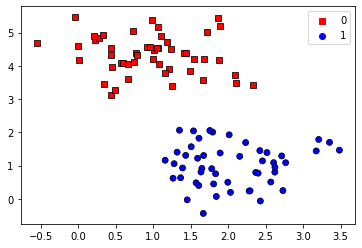

In [3]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black');

In [4]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1E10)
svc.fit(X_train, y_train)

LinearSVC(C=10000000000.0)

In [5]:
svc.score(X_train, y_train)

1.0

In [6]:
svc.score(X_test, y_test)

1.0

In [7]:
def plot_decision_boundaries(clf, X, y, feature_names, ax, title, h=0.02):  
    colors = ['r', 'b']
    cmap = ListedColormap(colors)
    
    # Fill each side of the decision boundary with the appropriate color
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
          
    # Plot the decision boundary and the margins
    xy = np.column_stack([xx.ravel(), yy.ravel()])
    P = clf.decision_function(xy).reshape(xx.shape)
    ax.contour(xx, yy, P, colors='k', levels=[-1, 0, 1], 
               linestyles=['--', '-', '--'])
    
    # Plot also the sample points
    sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y, ax=ax,
                    palette=colors, markers=('s', 'o'), edgecolor='black')
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_title(title)
    ax.legend()

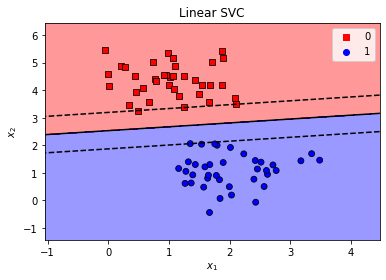

In [8]:
feature_names = ['$x_1$', '$x_2$']
plot_decision_boundaries(svc, X_train, y_train, feature_names, plt.gca(), title='Linear SVC')
    
plt.savefig('figures/linear_svc.pdf')

In [9]:
svc.predict([[1.5, 2]])

array([1])

In [10]:
svc.predict([[1.5, 3]])

array([0])

In [11]:
svc.coef_

array([[ 0.21189504, -1.50897945]])

In [12]:
svc.intercept_

array([3.8279331])

Soft-Margin Classification

In [13]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.2, 
                  random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

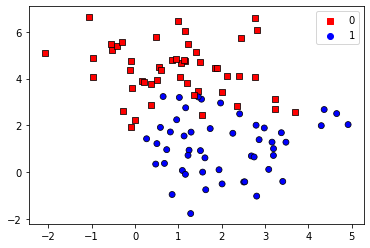

In [14]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black');

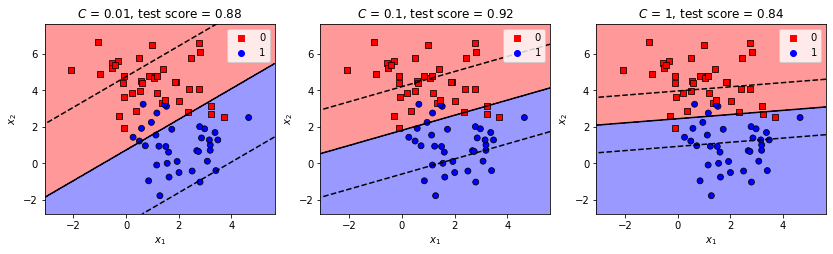

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))

for ax, C in zip(axes, [0.01, 0.1, 1]):
    svc = LinearSVC(C=C).fit(X_train, y_train)
    test_score = svc.score(X_test, y_test)
    plot_decision_boundaries(svc, X_train, y_train, feature_names, ax,
                             title=f'$C$ = {C}, test score = {test_score}')
plt.savefig('figures/svc_soft_margin.pdf')

Kernel SVC

In [16]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

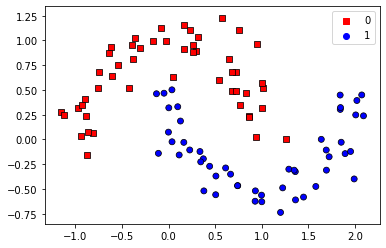

In [17]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.savefig('figures/svc_moons.pdf')

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
svc.score(X_train, y_train)

0.8666666666666667

In [20]:
svc.score(X_test, y_test)

0.84

In [21]:
# Get support vectors
svc.support_vectors_

array([[-4.22571849e-01,  5.16716435e-01],
       [-8.72287428e-01, -1.59446492e-01],
       [ 7.18965237e-01,  6.76279391e-01],
       [-9.41153792e-01,  3.62452210e-02],
       [ 8.61804797e-01,  2.34433125e-01],
       [ 8.60776122e-01,  2.23608288e-01],
       [ 1.25898341e+00,  9.45720361e-03],
       [-8.12672471e-01,  6.21062359e-02],
       [ 9.96941259e-01,  3.15739580e-01],
       [ 1.00423181e+00,  5.71970714e-01],
       [ 9.37139867e-01,  2.60605533e-02],
       [ 4.93322638e-02,  6.30807290e-01],
       [-8.64998057e-01,  7.08953126e-02],
       [ 7.25904958e-01,  4.88650919e-01],
       [ 1.13181276e-01, -1.56769318e-01],
       [ 2.07185930e+00,  4.49446699e-01],
       [ 3.36316802e-01, -1.21930601e-01],
       [ 1.74199561e-03,  3.19609386e-01],
       [ 9.76814019e-02,  3.30425533e-01],
       [ 3.53935925e-02,  5.01207225e-01],
       [ 3.72609000e-01, -1.95418424e-01],
       [ 4.40147205e-01, -2.70961540e-01],
       [ 1.84050613e+00,  4.48280521e-01],
       [-1.

In [22]:
# Get number of support vectors for each class
svc.n_support_

array([14, 14])

In [23]:
def plot_support_vectors(clf, ax):    
    ax.scatter(clf.support_vectors_[:, 0],
               clf.support_vectors_[:, 1],
               s=300, edgecolors='black', color='none')  

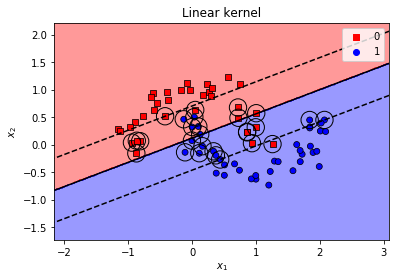

In [24]:
plot_decision_boundaries(svc, X_train, y_train, feature_names, 
                         plt.gca(), title='Linear kernel')
plot_support_vectors(svc, plt.gca())
    
plt.savefig('figures/svc_linear_kernel.pdf')

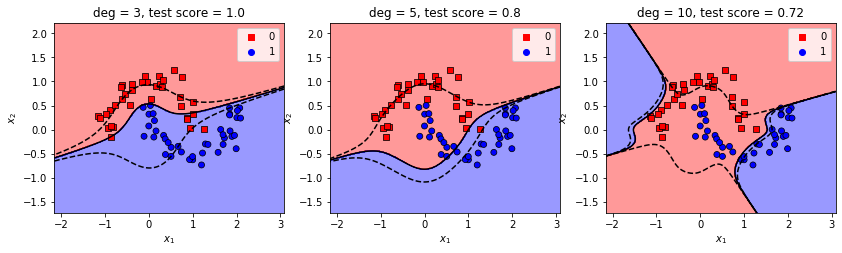

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))

for ax, deg in zip(axes, [3, 5, 10]):
    svc = SVC(kernel='poly', degree=deg).fit(X_train, y_train)
    test_score = svc.score(X_test, y_test)
    plot_decision_boundaries(svc, X_train, y_train, feature_names, ax,
                             title=f'deg = {deg}, test score = {test_score}')
    
plt.savefig('figures/svc_poly_kernel.pdf')

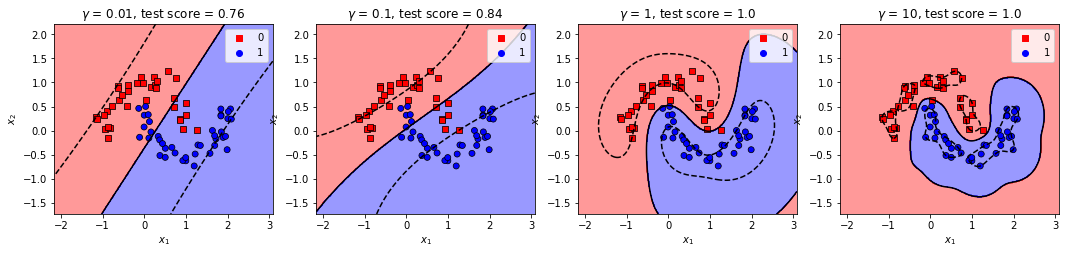

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(18, 3.5))

for ax, gamma in zip(axes, [0.01, 0.1, 1, 10]):
    svc = SVC(kernel='rbf', gamma=gamma).fit(X_train, y_train)
    test_score = svc.score(X_test, y_test)
    plot_decision_boundaries(svc, X_train, y_train, feature_names, ax,
                             title=f'$\gamma$ = {gamma}, test score = {test_score}')
    
plt.savefig('figures/svc_rbf_kernel.pdf')

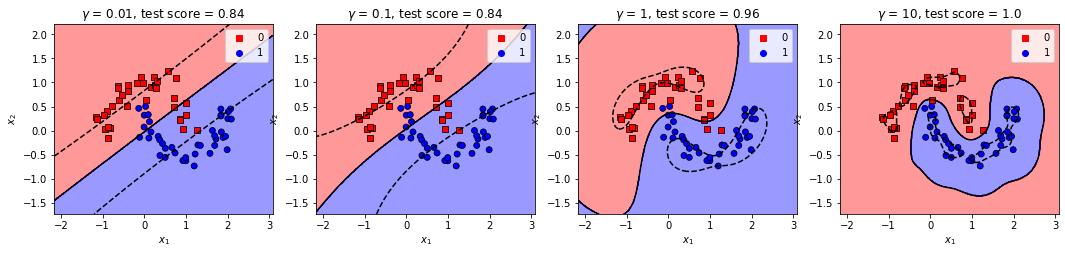

In [27]:
from sklearn.svm import NuSVC

fig, axes = plt.subplots(1, 4, figsize=(18, 3.5))

for ax, gamma in zip(axes, [0.01, 0.1, 1, 10]):
    svc = NuSVC(kernel='rbf', gamma=gamma).fit(X_train, y_train)
    test_score = svc.score(X_test, y_test)
    plot_decision_boundaries(svc, X_train, y_train, feature_names, ax,
                             title=f'$\gamma$ = {gamma}, test score = {test_score}')
    
plt.savefig('figures/nusvc_rbf_kernel.pdf')